In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Making of an Imbalanced Dataset


In [2]:
from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(n_samples=1000, n_redundant=0,n_clusters_per_class=1,n_features=2,weights=[0.90],random_state=1)

In [4]:
df = pd.DataFrame(X, columns=["Feature1","Feature2"])

In [5]:
df["Target"] = y

In [6]:
print(df.shape)
print(df["Target"].value_counts())

(1000, 3)
Target
0    894
1    106
Name: count, dtype: int64


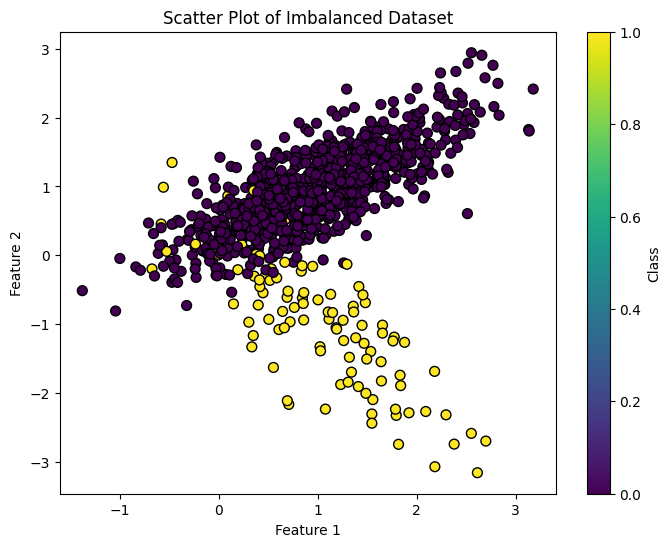

In [7]:
# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Feature1'], df['Feature2'], c=df['Target'], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Imbalanced Dataset')
plt.colorbar(label='Class')
plt.show()

# Handellinh the Imabalanced Data set by Down Sampling the majority data according to the miority dataset

In [8]:
from sklearn.utils import resample

In [12]:
# First we will need to seperate the majority and minority class data points 
df_major = df[df["Target"]==0]
df_minor = df[df["Target"]==1]


In [14]:
# Lets Downsample the majority class data with respect to the Majority class data 
df_major_down = resample(df_major,replace=True,n_samples = len(df_minor),random_state=1)

In [17]:
df_major_down["Target"].value_counts()

Target
0    106
Name: count, dtype: int64

In [21]:
# Concatenate the down-sampled majority class with the minority class
df_downsampled = pd.concat([df_major_down, df_minor])
df_downsampled["Target"].value_counts()

Target
0    106
1    106
Name: count, dtype: int64

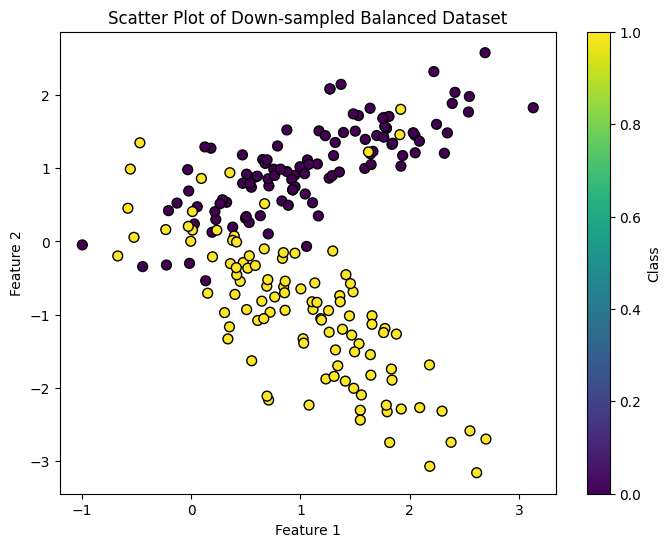

In [22]:
# Plotting the scatter plot for the down-sampled balanced dataset
plt.figure(figsize=(8, 6))
plt.scatter(df_downsampled['Feature1'], df_downsampled['Feature2'], c=df_downsampled['Target'], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Down-sampled Balanced Dataset')
plt.colorbar(label='Class')
plt.show()